In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/RD5aAnVTw8o3DkFJau05786rKeNnu6669.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/GJPO15yVhfpRlKldjSQSgVCqyHnFDU562.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/GXPcKwsOEQqqtRaIq8w0zFQCMUbFx6977.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/b3avIrjGsN1ROEAisS6KZdRNCHHkBP96.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/HffWubqROvueGYHhItQjdvPVXrJaCi485.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/TFGusnnlFxzh3Sa76kH6hsK4EY6vMB88.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/uyR1pgXRIT4ahYoMAgnT0nEbpf4iP7601.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/cLGnIHimbKDPhslP2BeBGcMIzNdsmh837.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/LhMue7C04hS016B1SsDON8uMCz6hp1504.jpg
/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/angry/eNA8tpkDuU1glbLzPiD1

In [4]:
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.12.0


In [5]:
data_dir = '/kaggle/input/dogs-remaster/dogs_emotions_god/Dog Emotion/'

In [6]:
from keras.preprocessing.image import ImageDataGenerator
#Especificamos los parametros del generador ENTRENAMIENTO donde tambien especificamos lo del 20% es validation split
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
#Especificamos parametros del generador VALIDACION
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_height = 255
img_width = 255

train_ds = train_datagen.flow_from_directory(
  data_dir,
  class_mode='categorical',
  subset="training",
  seed=123,
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 3200 images belonging to 4 classes.


In [7]:
val_ds = train_datagen.flow_from_directory(
  data_dir,
  class_mode='categorical',
  subset="validation",
  seed=123,
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 images belonging to 4 classes.


In [8]:
class_indices = train_ds.class_indices
class_names = list(class_indices.keys())
print(class_names)

['angry', 'happy', 'relaxed', 'sad']


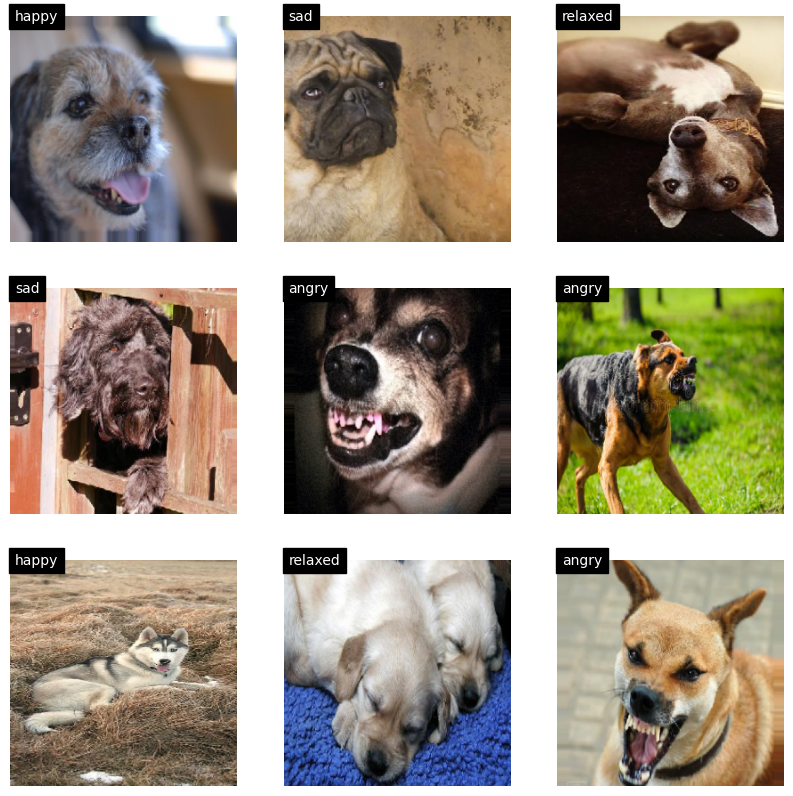

In [9]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_ds
images, labels = next(train_ds)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[i] * 255).astype("uint8"))
    plt.text(5, 5, class_names[labels[i].argmax()], color='white', backgroundcolor='black')
    plt.axis("off")

plt.show()



In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Inputs and rescaling
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(255, 255, 3))) 
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Tamaño de ventana 2

model.add(Conv2D(128, (2, 2), activation='relu', padding='same')) 
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Tamaño de ventana 2

model.add(Conv2D(256, (2, 2), activation='relu', padding='same')) 
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Tamaño de ventana 2

model.add(Conv2D(512, (2, 2), activation='relu', padding='same')) 
model.add(Conv2D(512, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Tamaño de ventana 2

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])






In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       65664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                    

In [13]:
history_callback = model.fit(train_ds,steps_per_epoch=len(train_ds),epochs=50,validation_data=val_ds,validation_steps=len(val_ds))

Epoch 1/50
100/100 [==============================] - 68s 676ms/step - loss: 1.3584 - accuracy: 0.2825 - val_loss: 1.3136 - val_accuracy: 0.3438
Epoch 2/50
100/100 [==============================] - 68s 679ms/step - loss: 1.3051 - accuracy: 0.3350 - val_loss: 1.2928 - val_accuracy: 0.3200
Epoch 3/50
100/100 [==============================] - 68s 685ms/step - loss: 1.2916 - accuracy: 0.3366 - val_loss: 1.2927 - val_accuracy: 0.3450
Epoch 4/50
100/100 [==============================] - 68s 680ms/step - loss: 1.2842 - accuracy: 0.3375 - val_loss: 1.2773 - val_accuracy: 0.3625
Epoch 5/50
100/100 [==============================] - 68s 679ms/step - loss: 1.2739 - accuracy: 0.3509 - val_loss: 1.3109 - val_accuracy: 0.3363
Epoch 6/50
100/100 [==============================] - 68s 683ms/step - loss: 1.2779 - accuracy: 0.3419 - val_loss: 1.2751 - val_accuracy: 0.3487
Epoch 7/50
100/100 [==============================] - 77s 768ms/step - loss: 1.2712 - accuracy: 0.3503 - val_loss: 1.2753 - val_ac

Text(0.5, 1.0, 'Training Accuracy and Loss')

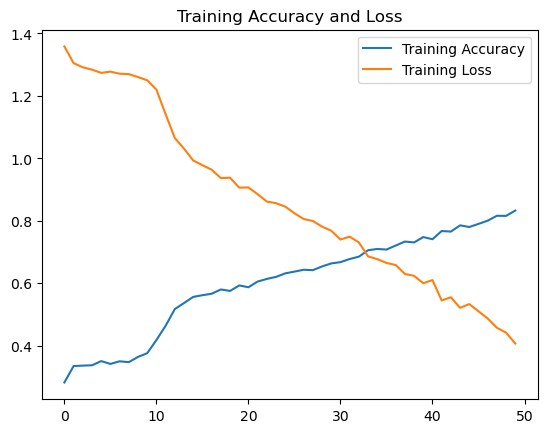

In [14]:
accuracy = history_callback.history['accuracy']
val_accuracy = history_callback.history['val_accuracy']

loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

Text(0.5, 1.0, 'Validation Accuracy and Loss')

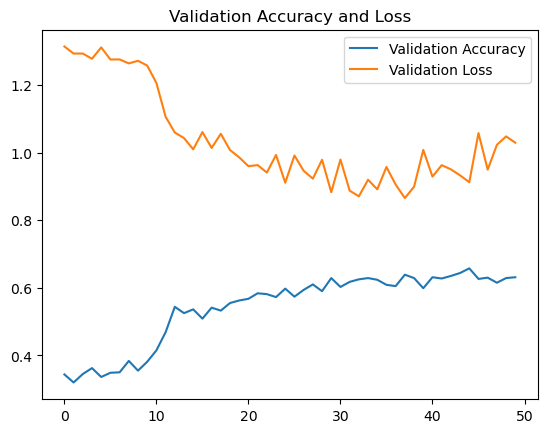

In [15]:
plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')


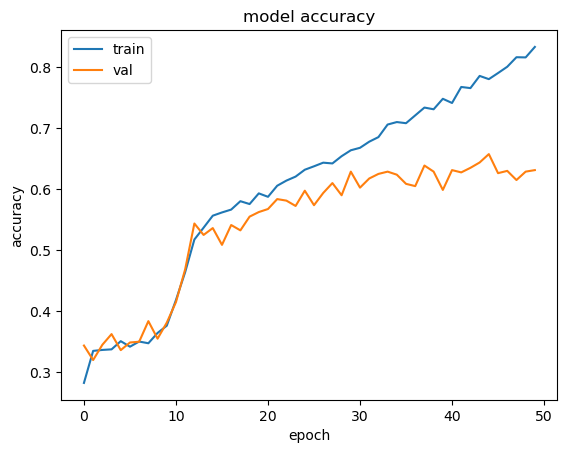

In [16]:
plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

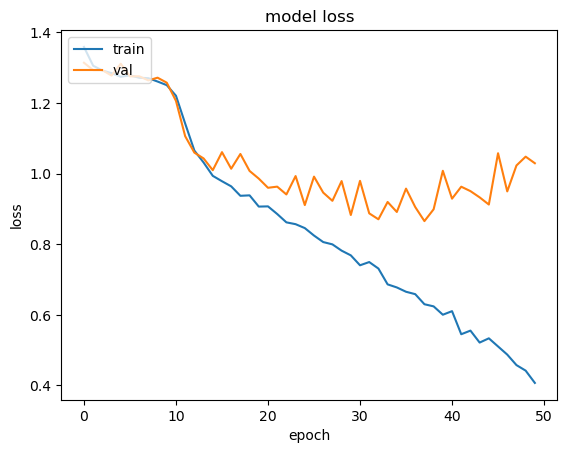

In [17]:
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("modelo_entrenado.h5")